In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ridge_regression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('../../data/processed/bigger_wildfire_weather_extra.csv')
df.head()

,x,y,containmentdatetime,controldatetime,dailyacres,discoveryacres,firecause,firediscoverydatetime,incidenttypecategory,incidenttypekind,...,wind_speed_10m_max_mean,humidity_mean,temp_2m_mean,rain_sum,dew_frost_point_2m,wet_bulb_temp_2m,relative_humidity,clear_sky_photosynthetically_active_radiation,all_sky_photosynthetically_active_radiation,all_sky_surface_uv_index
0,-115.748812,40.617506,2020-08-03 23:00:00+00:00,2020-09-02 15:00:00+00:00,5985.90,5.0,Natural,2020-07-19 23:00:00+00:00,WF,FI,...,5.237174,5.657391,23.396304,12.62,3.02,13.91,27.31,155.74,135.50,2.55
1,-113.751212,35.515265,2020-10-17 21:59:59+00:00,2020-10-19 15:00:00+00:00,135.00,1.0,Human,2020-10-15 18:17:00+00:00,WF,FI,...,5.186000,2.164000,21.522000,0.00,-6.50,8.11,13.62,97.43,97.50,1.37
2,-120.073602,39.769989,2020-06-24 19:02:00+00:00,2020-06-25 16:05:59+00:00,132.00,15.0,Natural,2020-06-24 00:17:59+00:00,WF,FI,...,5.650000,7.875000,25.600000,0.16,7.16,16.69,33.44,160.50,160.38,2.82
3,-120.772613,39.361785,2021-01-20 03:29:00+00:00,2021-01-21 00:57:00+00:00,1.88,1.0,Human,2021-01-19 19:40:00+00:00,WF,FI,...,4.540000,2.686667,1.500000,0.00,-9.35,-4.95,51.38,59.11,57.91,0.37
4,-122.974081,41.825916,2020-07-23 17:00:00+00:00,2020-07-26 15:00:00+00:00,13.00,0.1,Human,2020-07-22 19:09:59+00:00,WF,FI,...,3.176000,6.860000,21.058000,1.61,8.76,15.53,48.62,142.94,114.08,1.96


In [6]:
df.shape

(2109, 42)

In [4]:
df['firediscoverydatetime'] = pd.to_datetime(df['firediscoverydatetime'])
df['controldatetime'] = pd.to_datetime(df['controldatetime'])
df['containmentdatetime'] = pd.to_datetime(df['containmentdatetime'])

In [7]:
for i in df.columns:
    print(i)

x
y
containmentdatetime
controldatetime
dailyacres
discoveryacres
firecause
firediscoverydatetime
incidenttypecategory
incidenttypekind
initiallatitude
initiallongitude
irwinid
localincidentidentifier
poocounty
poodispatchcenterid
poofips
poostate
uniquefireidentifier
temp_2m
temp_2m_max
humidity
rain
wind_speed_2m
wind_speed_2m_max
wind_speed_10m
wind_speed_10m_max
surface_soil_wetness_5cm_below
surface_soil_wetness_to_bedrock
wind_speed_2m_mean
wind_speed_2m_max_mean
wind_speed_10m_mean
wind_speed_10m_max_mean
humidity_mean
temp_2m_mean
rain_sum
dew_frost_point_2m
wet_bulb_temp_2m
relative_humidity
clear_sky_photosynthetically_active_radiation
all_sky_photosynthetically_active_radiation
all_sky_surface_uv_index


In [10]:
cols = ['dailyacres', 'discoveryacres', 'temp_2m', 'temp_2m_max', 'humidity', 'rain', 'wind_speed_2m', 'wind_speed_2m_max', 'wind_speed_10m', 
        'wind_speed_10m_max', 'surface_soil_wetness_5cm_below', 'surface_soil_wetness_to_bedrock', 'wind_speed_2m_mean', 'wind_speed_2m_max_mean', 
        'wind_speed_10m_mean', 'wind_speed_10m_max_mean', 'humidity_mean', 'temp_2m_mean', 'rain_sum', 'dew_frost_point_2m', 'wet_bulb_temp_2m', 
        'relative_humidity', 'clear_sky_photosynthetically_active_radiation', 'all_sky_photosynthetically_active_radiation', 'all_sky_surface_uv_index']

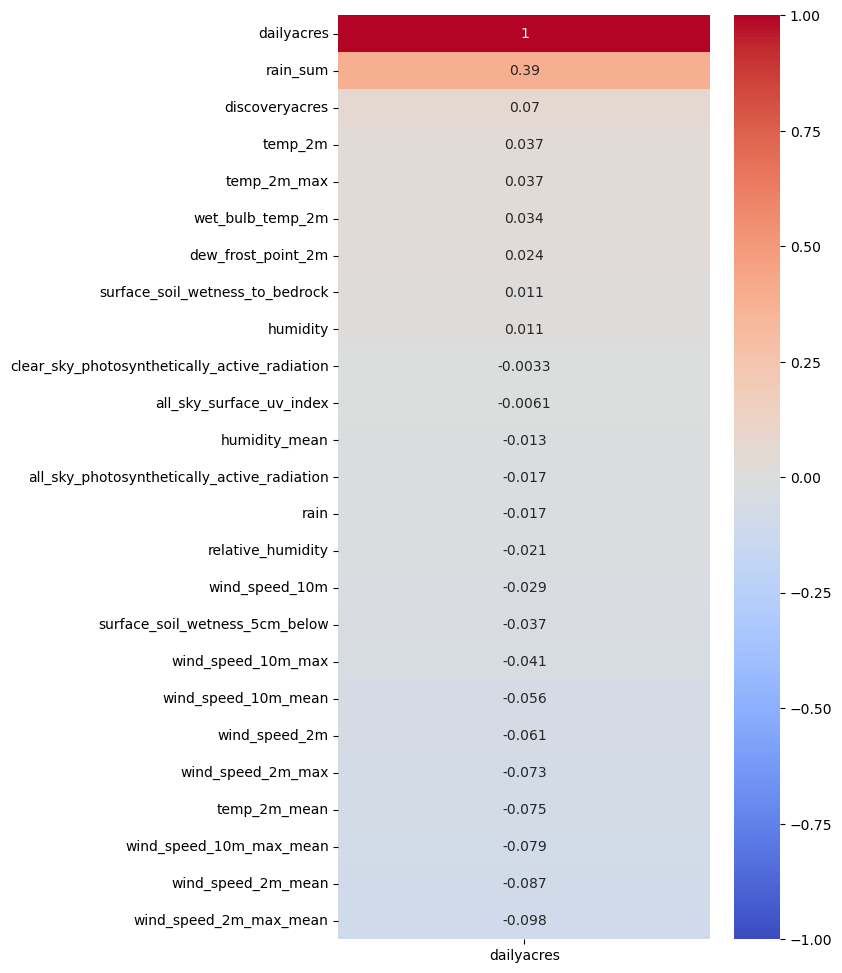

In [11]:
plt.figure(figsize = (6, 12))
sns.heatmap(df[cols].corr()[['dailyacres']].sort_values(by = 'dailyacres', ascending=False),
            vmin = -1,
            vmax = 1, 
            cmap = 'coolwarm',
            annot = True);

In [12]:
pca = PCA(random_state = 42)
df = df[cols]

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'dailyacres'), df['dailyacres'], random_state= 42)

In [13]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

In [16]:
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)
np.round(cumulative[:25], 3)

array([0.307, 0.573, 0.693, 0.766, 0.814, 0.855, 0.892, 0.925, 0.95 ,
       0.962, 0.97 , 0.979, 0.985, 0.99 , 0.993, 0.995, 0.997, 0.998,
       0.999, 0.999, 1.   , 1.   , 1.   , 1.   ])

In [17]:
Z_train = Z_train[:,:18]
Z_test = Z_test[:,:18]

In [18]:
#np.savetxt('../../data/processed/Z_train_bigfires.csv', Z_train, delimiter=',')
#np.savetxt('../../data/processed/Z_test_bigfires.csv', Z_test, delimiter=',')
#np.savetxt('../../data/processed/y_train_bigfires.csv', y_train, delimiter=',')
#np.savetxt('../../data/processed/y_test_bigfires.csv', y_test, delimiter=',')

In [19]:
#Linear Regression - Baseline
# With X data
lr = LinearRegression()

lr.fit(X_train, y_train)
print(f'Training R-Squared: {lr.score(X_train, y_train)}')
print(f'Testing R-Squared: {lr.score(X_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, lr.predict(X_test), squared = False)}')

Training R-Squared: 0.17133484695693924
Testing R-Squared: 0.2778975427053888
RMSE: 15639.78871841255


In [20]:
#Linear Regression - Baseline
# With PCA Data
lr = LinearRegression()

lr.fit(Z_train, y_train)
print(f'Training R-Squared: {lr.score(Z_train, y_train)}')
print(f'Testing R-Squared: {lr.score(Z_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, lr.predict(Z_test), squared = False)}')

Training R-Squared: 0.16825103208669245
Testing R-Squared: 0.28205323462032184
RMSE: 15594.720374531642


In [21]:
def model_eval(model, param_dict, training_data):
    '''
    d
    '''
    
    gs_model = GridSearchCV(model,
                            param_grid = param_dict,
                            n_jobs = -1)
    if training_data == 'X_train':
        gs_model.fit(X_train, y_train)
        print(f'Best Score: {gs_model.best_score_}')
        print(f'Best Params: {gs_model.best_params_}')
        print('='*50)
        print(f'RMSE: {mean_squared_error(y_test, gs_model.predict(X_test), squared = False)}')
        print('='*50)
        print(f'Training R-Squared: {gs_model.score(X_train, y_train)}')
        print(f'Testing R-Squared: {gs_model.score(X_test, y_test)}')
        
    elif training_data == 'Z_train':
        gs_model.fit(Z_train, y_train)
        print(f'Best Score: {gs_model.best_score_}')
        print(f'Best Params: {gs_model.best_params_}')
        print('='*50)
        print(f'RMSE: {mean_squared_error(y_test, gs_model.predict(Z_test), squared = False)}')
        print('='*50)
        print(f'Training R-Squared: {gs_model.score(Z_train, y_train)}')
        print(f'Testing R-Squared: {gs_model.score(Z_test, y_test)}')
    else:
        return 'Try Again'

In [34]:
#KNN Regressor with X Data

knn_model = KNeighborsRegressor(n_jobs=-1)

knn_params = {
    'n_neighbors': range(1000, 2001, 100),
    'weights': ['uniform', 'distance']
}

model_eval(model = knn_model,
           param_dict = knn_params,
           training_data = 'X_train')

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.0019103  -0.00269011 -0.00789126 -0.00666973 -0.01495071 -0.01083026
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]
  warnings.warn(


Best Score: -0.0019102989981059526
Best Params: {'n_neighbors': 1000, 'weights': 'uniform'}
RMSE: 18263.233911159263
Training R-Squared: 0.009941209402150486
Testing R-Squared: 0.015326109620418582


In [35]:
#KNN Regressor with PCA Data

knn_model = KNeighborsRegressor(n_jobs=-1)

knn_params = {
    'n_neighbors': range(1000, 2001, 100),
    'weights': ['uniform', 'distance']
}

model_eval(model = knn_model,
           param_dict = knn_params,
           training_data = 'Z_train')

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.00200916 -0.00265491 -0.00800593 -0.00664122 -0.01502216 -0.01077118
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]
  warnings.warn(


Best Score: -0.002009160968928514
Best Params: {'n_neighbors': 1000, 'weights': 'uniform'}
RMSE: 18263.103195239786
Training R-Squared: 0.009962911829059395
Testing R-Squared: 0.015340204834111026


In [36]:
# Lasso Regression with X Data

lasso = Lasso()
lasso_params = {
    'alpha': range(5, 101, 2)
}

model_eval(model = lasso,
           param_dict = lasso_params,
           training_data = 'X_train')

Best Score: -0.06189986083200603
Best Params: {'alpha': 99}
RMSE: 15562.595616410386
Training R-Squared: 0.16710948097522338
Testing R-Squared: 0.28500809499829427


In [37]:
# Lasso Regression with PCA Data

lasso = Lasso()
lasso_params = {
    'alpha': range(5, 101, 2)
}

model_eval(model = lasso,
           param_dict = lasso_params,
           training_data = 'Z_train')

Best Score: -0.05946689317877372
Best Params: {'alpha': 99}
RMSE: 15557.627224208109
Training R-Squared: 0.16628596100407034
Testing R-Squared: 0.2854645475392097


In [38]:
# Adaboost with X Data

ada = AdaBoostRegressor()
ada_params = {
    'n_estimators': range(40, 101, 10),
    'learning_rate': [0.5, 0.75, 1, 1.25, 1.5] 
}

model_eval(model = ada,
           param_dict = ada_params,
           training_data = 'X_train')

Best Score: -1.229233886898721
Best Params: {'learning_rate': 0.5, 'n_estimators': 40}
RMSE: 19942.2457916536
Training R-Squared: 0.6532676383216354
Testing R-Squared: -0.1740462041659694


In [39]:
# Adaboost with PCA Data

ada = AdaBoostRegressor()
ada_params = {
    'n_estimators': range(40, 101, 10),
    'learning_rate': [0.5, 0.75, 1, 1.25, 1.5] 
}

model_eval(model = ada,
           param_dict = ada_params,
           training_data = 'Z_train')

Best Score: -0.8696280358609834
Best Params: {'learning_rate': 0.5, 'n_estimators': 40}
RMSE: 18591.52407153525
Training R-Squared: 0.7001882175227019
Testing R-Squared: -0.020392001912860724


In [56]:
# Random Forest with X_train

rf = RandomForestRegressor(n_jobs = -1)

rf_params = {
    'max_depth': range(70, 201, 10),
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'ccp_alpha': [0.01, 0.1, 0.5, 1]
}

model_eval(model = rf,
           param_dict = rf_params,
           training_data = 'X_train')

Best Score: -0.2530594192656893
Best Params: {'ccp_alpha': 0.1, 'max_depth': 180, 'min_samples_leaf': 3, 'min_samples_split': 2}
RMSE: 16416.31340568967
Training R-Squared: 0.5854725752079336
Testing R-Squared: 0.20441180814714455


In [58]:
# Random Forest with PCA

rf = RandomForestRegressor(n_jobs = -1)

rf_params = {
    'max_depth': range(70, 201, 10),
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'ccp_alpha': [0.01, 0.1, 0.5, 1]
}

model_eval(model = rf,
           param_dict = rf_params,
           training_data = 'Z_train')

Best Score: -0.29544449911795334
Best Params: {'ccp_alpha': 0.1, 'max_depth': 200, 'min_samples_leaf': 3, 'min_samples_split': 3}
RMSE: 15983.254054646812
Training R-Squared: 0.5698722617414869
Testing R-Squared: 0.24583310503806466


---

In [47]:
# Stacking Regressor with X_train

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=DecisionTreeRegressor(),
                         n_jobs=-1)

stack.fit(X_train, y_train)

print(f'Training R-Squared: {stack.score(X_train, y_train)}')
print(f'Testing R-Squared: {stack.score(X_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(X_test), squared = False)}')

Training R-Squared: -0.062230590623943094
Testing R-Squared: -0.07997992274622145
RMSE: 19126.667638648683


In [40]:
# Stacking Regressor with Z_train

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=DecisionTreeRegressor(),
                         n_jobs=-1)

stack.fit(Z_train, y_train)

print(f'Training R-Squared: {stack.score(Z_train, y_train)}')
print(f'Testing R-Squared: {stack.score(Z_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(Z_test), squared = False)}')

Training R-Squared: 0.09344041131704584
Testing R-Squared: -0.20186186282172458
RMSE: 20177.100053547478


In [48]:
# Stacking Regressor with X_train

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=LinearRegression(),
                         n_jobs=-1)

stack.fit(X_train, y_train)

print(f'Training R-Squared: {stack.score(X_train, y_train)}')
print(f'Testing R-Squared: {stack.score(X_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(X_test), squared = False)}')

Training R-Squared: 0.2554078584323497
Testing R-Squared: 0.26153657482558923
RMSE: 15815.974842212936


In [42]:
# Stacking Regressor with PCA

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=LinearRegression(),
                         n_jobs=-1)

stack.fit(Z_train, y_train)

print(f'Training R-Squared: {stack.score(Z_train, y_train)}')
print(f'Testing R-Squared: {stack.score(Z_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(Z_test), squared = False)}')

Training R-Squared: 0.09326870896544126
Testing R-Squared: 0.2940927886870889
RMSE: 15463.410305670468


In [49]:
# Stacking Regressor with X_train

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=Lasso(),
                         n_jobs=-1)

stack.fit(X_train, y_train)

print(f'Training R-Squared: {stack.score(X_train, y_train)}')
print(f'Testing R-Squared: {stack.score(X_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(X_test), squared = False)}')

Training R-Squared: 0.08549472299369454
Testing R-Squared: 0.27806242995748676
RMSE: 15638.00299604798


In [50]:
# Stacking Regressor with PCA

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=Lasso(),
                         n_jobs=-1)

stack.fit(Z_train, y_train)

print(f'Training R-Squared: {stack.score(Z_train, y_train)}')
print(f'Testing R-Squared: {stack.score(Z_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(Z_test), squared = False)}')

Training R-Squared: 0.04389292174951964
Testing R-Squared: 0.29462361544615145
RMSE: 15457.595139343894


In [51]:
# Stacking Regressor with X_train

lvl1_est = ([
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=Lasso(),
                         n_jobs=-1)

stack.fit(X_train, y_train)

print(f'Training R-Squared: {stack.score(X_train, y_train)}')
print(f'Testing R-Squared: {stack.score(X_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(X_test), squared = False)}')

Training R-Squared: -0.09219904281525393
Testing R-Squared: 0.30355319635872857
RMSE: 15359.442240091097


In [52]:
# Stacking Regressor with PCA

lvl1_est = ([
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

stack = StackingRegressor(estimators=lvl1_est, 
                          final_estimator=Lasso(),
                         n_jobs=-1)

stack.fit(Z_train, y_train)

print(f'Training R-Squared: {stack.score(Z_train, y_train)}')
print(f'Testing R-Squared: {stack.score(Z_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, stack.predict(Z_test), squared = False)}')

Training R-Squared: 0.19027240294668057
Testing R-Squared: 0.29703173721592424
RMSE: 15431.186829839435


In [53]:
#Voting Classifier with X_train

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

vote = VotingRegressor(estimators = lvl1_est, n_jobs = -1)

vote.fit(X_train, y_train)
print(f'Training R-Squared: {vote.score(X_train, y_train)}')
print(f'Testing R-Squared: {vote.score(X_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, vote.predict(X_test), squared = False)}')

Training R-Squared: 0.6616571452907578
Testing R-Squared: 0.0830865442231642
RMSE: 17623.641238516386


In [54]:
#Voting Classifier with PCA

lvl1_est = ([
    ('rf', RandomForestRegressor(n_jobs=-1)),
    ('ada', AdaBoostRegressor()),
    ('lasso', Lasso())
])

vote = VotingRegressor(estimators = lvl1_est, n_jobs = -1)

vote.fit(Z_train, y_train)
print(f'Training R-Squared: {vote.score(Z_train, y_train)}')
print(f'Testing R-Squared: {vote.score(Z_test, y_test)}')
print('='*50)
print(f'RMSE: {mean_squared_error(y_test, vote.predict(Z_test), squared = False)}')

Training R-Squared: 0.669675720288293
Testing R-Squared: 0.14713489908211408
RMSE: 16996.97525296164
